In [28]:
import json
import time
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import quandl
from config import api_key
import csv
import os

# Master Data - CSV

In [29]:
master_data_path = os.path.join("..", "..", "data", "project_one_data", "master_data_cleaned.csv")
master_data_df = pd.read_csv(master_data_path)
master_data_df.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.0,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.0,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.0,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.0,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.0,30566.0,3.5,3.88,3.66


In [30]:
# Convert Year-Month to Datetime(ns) -- Shared by Binet Alagic
master_data_df["Year-Month"] = master_data_df["Year-Month"].apply(pd.to_datetime)
master_data_df["Year-Month"] = pd.to_datetime(master_data_df["Year-Month"], format="%Y%B")

In [31]:
master_data_cleaned = master_data_df.drop(columns={"Date Zillow", "Date Interest"})

In [32]:
master_data_cleaned = master_data_cleaned.dropna(how="any")

In [33]:
master_data_cleaned

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-04-01,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.00,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-04-01,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.00,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-04-01,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.00,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-04-01,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.00,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-04-01,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.00,30566.0,3.5,3.88,3.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66959,2020,Aug,2020-08-01,CRSM,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.14,332367.0,6.7,2.88,2.91
66960,2020,Aug,2020-08-01,CRAM,"Share of Listings With a Price Cut (Raw, All H...",394645,metro,"Greeley, CO",0.14,332367.0,6.7,3.00,2.88
66961,2020,Aug,2020-08-01,CRAM,"Share of Listings With a Price Cut (Raw, All H...",394645,metro,"Greeley, CO",0.14,332367.0,6.7,3.00,2.96
66962,2020,Aug,2020-08-01,CRAM,"Share of Listings With a Price Cut (Raw, All H...",394645,metro,"Greeley, CO",0.14,332367.0,6.7,2.88,2.99


# SSAM - Median Prices, All Homes

In [34]:
# Look at SSAM - All Homes Monthly
ssam_df = master_data_cleaned[master_data_df["Indicator ID"] == "SSAM"]

C:\Users\coled\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [49]:
ssam_df

,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
417,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",246388.0,689481.0,3.5,3.88,3.66
582,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.75,3.61
583,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.75,3.57
584,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.88,3.58
585,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.88,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66095,2020,Jul,2020-07-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",380467.0,332367.0,7.4,3.00,2.99
66576,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",382967.0,332367.0,6.7,3.00,2.88
66577,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",382967.0,332367.0,6.7,3.00,2.96
66578,2020,Aug,2020-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",382967.0,332367.0,6.7,2.88,2.99


In [44]:
ssam_df_single = ssam_df.drop_duplicates(subset=["Year-Month", "Region Name", "Value"])


In [50]:
ssam_df_single = ssam_df_single.reset_index()

In [51]:
ssam_df_single

,index,Year,Month,Year-Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,417,2016,Apr,2016-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",246388.0,689481.0,3.5,3.88,3.66
1,582,2016,May,2016-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",251325.0,689481.0,3.4,3.75,3.61
2,791,2016,Jun,2016-06-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",254613.0,689481.0,3.4,3.88,3.66
3,984,2016,Jul,2016-07-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",257738.0,689481.0,3.3,3.63,3.41
4,1193,2016,Aug,2016-08-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394484,metro,"Colorado Springs, CO",261725.0,689481.0,3.3,3.63,3.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,64441,2020,Apr,2020-04-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",370785.0,332367.0,12.2,3.50,3.33
155,65010,2020,May,2020-05-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",378619.0,332367.0,10.2,3.25,3.26
156,65562,2020,Jun,2020-06-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",379528.0,332367.0,10.6,3.13,3.18
157,66091,2020,Jul,2020-07-01,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394645,metro,"Greeley, CO",380467.0,332367.0,7.4,3.00,3.07


## SSAMs Variables by Region Name

In [9]:
# Denver SSAM

denver_ssam = ssam_df[ssam_df["Region Name"].str.contains("Denver")].groupby("Year-Month").first()

In [10]:
# Colorado Springs SSAM
co_springs_ssam = ssam_df[ssam_df["Region Name"].str.contains("Colorado Springs")].groupby("Year-Month").first()

In [11]:
# Greeley SSAM
greeley_ssam = ssam_df[ssam_df["Region Name"].str.contains("Greeley")].groupby("Year-Month").first()

## SSAM Graphs / Correlations

#### Denver, CO

In [12]:
denver_ssam.head()

,Year,Month,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
Year-Month,,,,,,,,,,,,
2016-04-01,2016,Apr,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",340150.0,697744.0,3.5,3.88,3.66
2016-05-01,2016,May,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",350150.0,697744.0,3.4,3.75,3.61
2016-06-01,2016,Jun,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",358000.0,697744.0,3.4,3.88,3.66
2016-07-01,2016,Jul,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",360750.0,697744.0,3.3,3.63,3.41
2016-08-01,2016,Aug,SSAM,"Median Sale Price (Smooth, All Homes, Monthly)",394530,metro,"Denver, CO",362000.0,697744.0,3.3,3.63,3.43


The correlation between the unemployment rate and median sale price is: 0.4161209458541474.


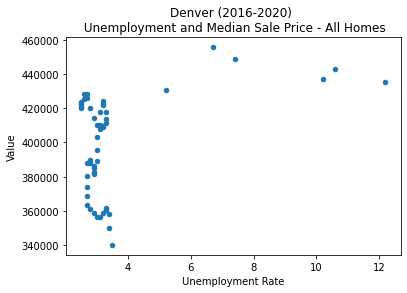

In [13]:
# Set x,y for correlation and scatter
den_unemp_x = denver_ssam["Unemployment Rate"]
den_value_y = denver_ssam["Value"]

# Calc correlation
denver_correlation = st.pearsonr(den_unemp_x,den_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {denver_correlation[0]}.")

# Plot
unemp_value_df = denver_ssam[["Unemployment Rate", "Value"]]
unemp_value_df.plot("Unemployment Rate", "Value", kind="scatter")
plt.title("Denver (2016-2020) \n Unemployment and Median Sale Price - All Homes")
plt.show()

#### Denver, SSAM Pre-COVID

In [14]:
# Pre-COVID

denver_ssam_pre19 = ssam_df[(ssam_df["Region Name"].str.contains("Denver")) & (ssam_df["Year-Month"] < "2020-03-01")].groupby("Year-Month").first()

The correlation between the unemployment rate and median sale price is: -0.3469157175371589.


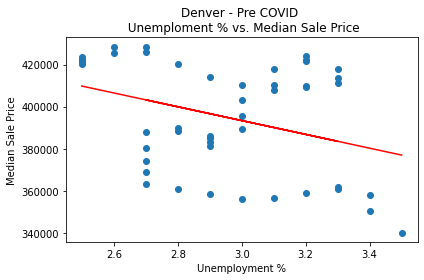

In [23]:
# Set x,y for correlation and scatter
pre19_den_unemp_x = denver_ssam_pre19["Unemployment Rate"]
pre19_den_value_y = denver_ssam_pre19["Value"]

# Calc correlation
pre19_denver_correlation = st.pearsonr(pre19_den_unemp_x,pre19_den_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {pre19_denver_correlation[0]}.")

# Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(pre19_den_unemp_x, pre19_den_value_y)
den_regress_values = pre19_den_unemp_x * slope + intercept

# Plot
plt.scatter(pre19_den_unemp_x, pre19_den_value_y)
plt.plot(pre19_den_unemp_x, den_regress_values, "r-")

# den_ssam_scatter = denver_ssam_pre19[["Unemployment Rate", "Value"]]
# den_ssam_scatter.plot("Unemployment Rate", "Value", kind="scatter")
# plt.title("Denver (2016-2020) \n Unemployment and Median Sale Price - All Homes")
# plt.show()

# Line Equation
# greeley_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Design Plot
# plt.annotate(greeley_line_eq,(6, 280000),fontsize=15,color="red")
plt.title("Denver - Pre COVID \n Unemploment % vs. Median Sale Price")
plt.xlabel("Unemployment %")
plt.ylabel('Median Sale Price')

# Show
plt.tight_layout()
plt.savefig("images/pre-covid_denver_ssam_unemp.jpeg")

#### Denver, SSAM During COVID

In [24]:
denver_ssam_dur19 = ssam_df[(ssam_df["Region Name"].str.contains("Denver")) & (ssam_df["Year-Month"] >= "2020-03-01")].groupby("Year-Month").first()

The correlation between the unemployment rate and median sale price is: -0.21284092153632506.


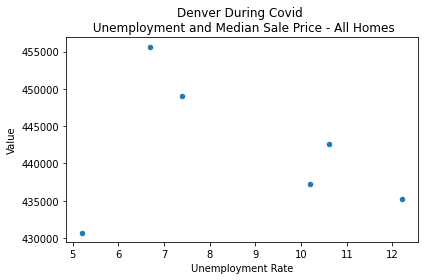

In [27]:
# Set x,y for correlation and scatter
dur19_den_unemp_x = denver_ssam_dur19["Unemployment Rate"]
dur19_den_value_y = denver_ssam_dur19["Value"]

# Calc correlation
dur19_denver_correlation = st.pearsonr(dur19_den_unemp_x,dur19_den_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {dur19_denver_correlation[0]}.")

# Plot
denver_ssam_dur19 = denver_ssam_dur19[["Unemployment Rate", "Value"]]
den_sam_scatter = denver_ssam_dur19.plot("Unemployment Rate", "Value", kind="scatter")
plt.title("Denver During Covid \n Unemployment and Median Sale Price - All Homes")
plt.tight_layout()
plt.savefig("images/dur-covid_denver_ssam_unemp.jpeg")

### Findings: Unemployment and Median Sale Price - Denver

There was weak negative correlation between unemployment rate and median sale price pre-COVID. However, during COVID-19, there is no correlation between unemployment rate and median sale price. 

In [ ]:
den_ssam_box = denver_ssam.boxplot(by="Year", column="Value").set_title("")
plt.ylabel("Denver Median Sale Price")
plt.show()

In [ ]:
den_unemp_box = denver_ssam.boxplot(by="Year", column="Unemployment Rate").set_title("")
plt.ylabel("Denver Unemployment Rate")
plt.show()

## Master SSSM DataFrame

In [ ]:
# Look at SSSM - SFR Only
sssm_df = master_data_df[master_data_df["Indicator ID"] == "SSSM"]
sssm_df.head()

In [ ]:
sssm_all = master_data_df[(master_data_df["Indicator ID"] =="SSSM")]
sssm_all = sssm_all.sort_values("Year-Month")
sssm_all = sssm_all.groupby("Year-Month").first()
sssm_all.head()

In [ ]:
all_sssm_unemp_x = sssm_all["Unemployment Rate"]
all_sssm_value_y = sssm_all["Value"]

correlation = st.pearsonr(all_sssm_unemp_x,all_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

In [ ]:
plt.scatter(all_sssm_unemp_x, all_sssm_value_y)
plt.title("CO Spring, Greeley, Denver \n % Unemployed vs. Median Sale Price ($)")
plt.xlabel("Colorado Unemployment %")
plt.ylabel("Median Sale Price $")
plt.show()

In [ ]:
sssm_all.boxplot(by="Region Name", column="Value").set_title("")

### Fredie Mac & Unemployment Correlation

In [ ]:
all_sssm_unemp_x = sssm_all["Unemployment Rate"]
all_sssm_fmr_y = sssm_all["Freddie Mac Rate"]

correlation = st.pearsonr(all_sssm_unemp_x,all_sssm_fmr_y)
print(f"The correlation between the unemployment rate and Freddit Mac Rate is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

### Wells Fargo & Unemployment Correlation

In [ ]:
all_sssm_unemp_x = sssm_all["Unemployment Rate"]
all_sssm_wf_y = sssm_all["Wells Fargo Rate"]

correlation = st.pearsonr(all_sssm_unemp_x,all_sssm_wf_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

In [ ]:
# Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(all_sssm_unemp_x, all_sssm_wf_y)
wf_regress_values = all_sssm_unemp_x * slope + intercept

# Line Equation
wf_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(greeley_unem_x,greeley_value_y)

### Correlation: All Unemployed, Median Sale Price

In [ ]:
all_sssm_unemp_x = sssm_df["Unemployment Rate"]
all_sssm_value_y = sssm_df["Value"]

correlation = st.pearsonr(all_sssm_unemp_x,all_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

### Correlation: Greeley - Unemployed, Median Sale Price

In [ ]:
sssm_df_greely = sssm_df[sssm_df["Region Name"].str.contains("Greeley")]

In [ ]:
greeley_sssm_unemp_x = sssm_df_greely["Unemployment Rate"]
greeley_sssm_value_y = sssm_df_greely["Value"]

correlation = st.pearsonr(greeley_sssm_unemp_x,greeley_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

In [ ]:
# Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(greeley_sssm_unemp_x, greeley_sssm_value_y)
greeley_regress_values = greeley_sssm_unemp_x * slope + intercept

# Line Equation
greeley_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(greeley_sssm_unemp_x,greeley_sssm_value_y)
plt.plot(greeley_sssm_unemp_x,greeley_regress_values,"r-")

# Design Plot
plt.annotate(greeley_line_eq,(6, 280000),fontsize=15,color="red")
plt.title("Greeley, CO \n Unemploment % vs. Median Sale Price")
plt.xlabel("Unemployment %")
plt.ylabel('Median Sale Price')

# Show
plt.show()

### Correlation: Colorado Springs - Unemployed, Median Sale Price

In [ ]:
sssm_df_cosprings = master_data_df[(master_data_df["Indicator ID"] =="SSSM") & master_data_df["Region Name"].str.contains("Colorado Springs")]
sssm_df_cosprings = sssm_df_cosprings.groupby("Year-Month").first()

In [ ]:
cosprings_sssm_unemp_x = sssm_df_cosprings["Unemployment Rate"]
cosprings_sssm_value_y = sssm_df_cosprings["Value"]

correlation = st.pearsonr(cosprings_sssm_unemp_x,cosprings_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

### Correlation: Denver - Unemployed, Median Sale Price

In [ ]:
sssm_denver_df = master_data_df[(master_data_df["Indicator ID"] =="SSSM") & master_data_df["Region Name"].str.contains("Denver") ]
sssm_denver_df = sssm_denver_df.groupby("Year-Month").first()

In [ ]:
denver_sssm_unemp_x = sssm_denver_df["Unemployment Rate"]
denver_sssm_value_y = sssm_denver_df["Value"]

correlation = st.pearsonr(denver_sssm_unemp_x,denver_sssm_value_y)
print(f"The correlation between the unemployment rate and median sale price is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

In [ ]:
# No Data on SSSM for Breckenridge, CO
# sssm_df_breck = sssm_df[sssm_df["Region Name"].str.contains("Breckenridge")]
# sssm_df_breck
# sssm_df["Region Name"].unique()

In [ ]:
# sssm_greeley_scatter = sssm_df_greely.plot("Unemployment Rate", "Value", kind="scatter")

# # Find Correlation
# correlation = st.pearsonr(greeley_unem_x,greeley_value_y)
# print(f"The correlation between the unemployment rate and median sale price value in Greeley, CO is: {correlation[0]}.")
# print(f"P-Value is: {correlation[1]}.")

# # FIND LINEAR REGRESSION
# greeley_unem_x = sssm_df_greely["Unemployment Rate"]
# greeley_value_y = sssm_df_greely["Value"]

# # Formula
# (slope, intercept, rvalue, pvalue, stderr) = linregress(greeley_unem_x, greeley_value_y)
# greeley_regress_values = greeley_unem_x * slope + intercept

# # Line Equation
# greeley_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Plot
# plt.scatter(greeley_unem_x,greeley_value_y)
# plt.plot(greeley_unem_x,greeley_regress_values,"r-")

# # Design Plot
# plt.annotate(greeley_line_eq,(6, 280000),fontsize=15,color="red")
# plt.xlabel("Unemployment %")
# plt.ylabel('Median Sale Price')

# # Show
# plt.show()